<a href="https://colab.research.google.com/github/kznfrd/ml_study/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### XGBoostを触ってみる

In [1]:
pip install xgboost

breast cancer

In [2]:
import xgboost as xgb

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle=True,
                                                   random_state=123, stratify=y)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

model = xgb.train(xgb_params,
                dtrain,
                num_boost_round=100)


In [5]:
y_pred_proba = model.predict(dtest)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.968421052631579


<Figure size 1000x1000 with 0 Axes>

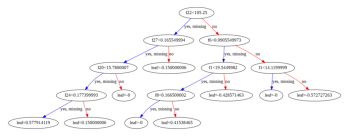

In [10]:
# visualize tree
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20), dpi=50)
plot_tree(model, )
plt.show()

MNIST

In [ ]:
dataset = datasets.load_digits()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle=True,
                                                   random_state=123, stratify=y)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    'objective': 'multi:softmax', # 他クラス分類
    'num_class': 10, 
    'eval_metric': 'logloss',
}

bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=100)


In [ ]:
y_pred = bst.predict(dtest)
# y_pred = np.where(y_pred_proba > 0.5, 1, 0)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9477196885428254
